In [83]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

import time

In [84]:
X,y = load_diabetes(return_X_y = True)

In [85]:
X.shape

(442, 10)

In [86]:
y.shape

(442,)

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [88]:
reg = LinearRegression()
reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [89]:
print(reg.coef_)
print(reg.intercept_)

[  32.50000078 -274.2083569   501.52744069  368.7931961  -822.31120988
  504.23867319  101.57697155  158.16545687  744.91541712   78.40553632]
154.31230345901605


In [90]:
y_pred = reg.predict(X_test)

In [91]:
r2_score(y_test, y_pred )

0.4522338796354569

In [92]:
X_train.shape

(353, 10)

In [93]:
####  making own GDregressor class

### Vectorized Gradient for Coefficients

For multiple linear regression:

$$
\hat{y}_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \dots + \beta_p x_{pi}
$$

In matrix form:

$$
\hat{y} = X\beta + \beta_0
$$

Where:

- $X \in \mathbb{R}^{n \times p}$
- $\beta \in \mathbb{R}^{p}$
- $\hat{y} \in \mathbb{R}^{n}$

---

### Cost Function (MSE)

$$
J(\beta) =
\frac{1}{n}
\sum_{i=1}^{n}
(y_i - \hat{y}_i)^2
$$

---

### Define Error Vector

$$
\text{errors} = y - \hat{y}
$$

---

### Gradient with Respect to Coefficients

From derivation:

$$
\frac{\partial J}{\partial \beta}
=
-\frac{2}{n}
X^T (y - \hat{y})
$$

---

### Implementation in Code

```python
d_coef = (-2 / n_samples) * np.dot(X.T, errors)


In [94]:
class GDRegressor:
    
    def __init__(self, learning_rate=0.01, epochs=1000, tol=1e-6):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tol = tol
        self.coef_ = None
        self.intercept_ = None
        self.losses_ = None

    def fit(self, X, y):
        
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0
        
        self.losses_ = []
        print("Tolerance:", self.tol)

        for epoch in range(self.epochs):
            
            # Predictions
            y_pred = np.dot(X, self.coef_) + self.intercept_
            
            # Errors
            errors = y - y_pred
            
            # Compute loss (MSE)
            loss = np.mean(errors ** 2)
            self.losses_.append(loss)
            
            # Gradients (Batch GD)
            d_coef = (-2 / n_samples) * np.dot(X.T, errors)
            d_intercept = (-2 / n_samples) * np.sum(errors)
            
            # Compute gradient norm 
            grad_norm = np.linalg.norm(d_coef)
            
            # Early stopping based on gradient magnitude
            if grad_norm < self.tol:
                print(f"Stopped early at epoch {epoch}")
                break
            
            # Update
            self.coef_ -= self.learning_rate * d_coef
            self.intercept_ -= self.learning_rate * d_intercept
        
        return self

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

In [105]:
gd = GDRegressor(learning_rate=0.04, epochs=1000, tol=1e-2 )

In [106]:
start = time.time()
gd.fit(X_train, y_train)
print("time taken in batch gd : " , time.time() - start)

Tolerance: 0.01
time taken in batch gd :  0.07365202903747559


In [107]:
y_pred = gd.predict(X_test)

In [108]:
print(gd.coef_)
print(gd.intercept_)

[ 37.92786851  -9.00584423 140.47273439 106.94672927  34.83935596
  23.42304372 -86.27058163  84.48744396 129.95580847  84.98112609]
153.55964706924345


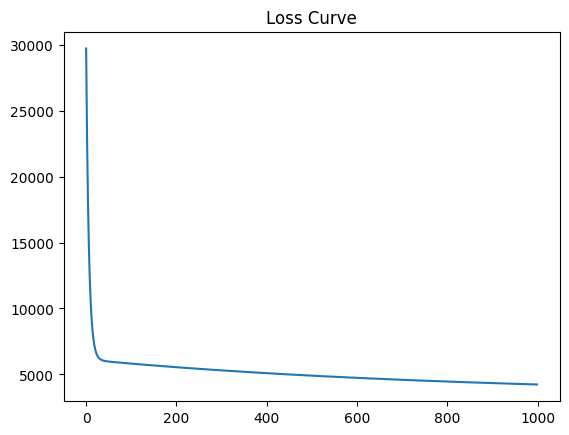

In [109]:
import matplotlib.pyplot as plt
plt.plot(gd.losses_)
plt.title("Loss Curve")
plt.show()